In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import train_test_split

**Datasets and Preprocessing**

#### Analysis of Deaths due to COVID-19 in World and India

In [ ]:
#Deaths in World and India

world_covid_deaths=pd.read_csv('/content/time_series_covid19_deaths_global1.csv')
world_covid_deaths.drop(columns=['Province/State','Lat','Long'],inplace=True)
India_covid_deaths=world_covid_deaths[world_covid_deaths['Country/Region']=='India']
print(India_covid_deaths)
world_covid_deaths

    Country/Region  1/22/20  1/23/20  ...  7/13/20  7/14/20  7/15/20
131          India        0        0  ...    23727    24309    24914

[1 rows x 177 columns]


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012,1048,1094
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95,97,101
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,698,707,715,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861,869,878,885,892,897,905,912,920,928,937,946,952,959,968,978,988,996,1004,1011,1018,1028,1040
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,5,5,6,6,6,6,7,8,8,9,9,10,10,10,10,10,10,11,11,13,15,17,18,19,19,19,21,21,22,23,23,26,26,26,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14
262,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,111,112,112,127,129,136,139,160,164,208,214,244,248,251,254,256,257,261,274,288,293,296,302,304,312,318,325,335,337,338,345,348,351,361,364,365,417,424,429,433
263,Comoros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,3,3,5,5,5,5,5,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
264,Tajikistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48,48,48,48,48,49,49,50,50,50,50,51,51,51,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,53,53,53,54,54,55,55,55,55,56,56


In [ ]:
#columns

cols=world_covid_deaths.keys()
cols=cols[1:]
cols

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/6/20', '7/7/20', '7/8/20', '7/9/20', '7/10/20', '7/11/20', '7/12/20',
       '7/13/20', '7/14/20', '7/15/20'],
      dtype='object', length=176)

In [ ]:
#Access  Deaths daily in World

world_deaths=[]
cov_deaths=world_covid_deaths.values
for i in range(1,len(cols)+1):
  world_deaths.append(cov_deaths[:,i].sum())
world_deaths=np.array(world_deaths).reshape(-1,1)
world_deaths

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2008],
       [  2123],
       [  2248],
       [  2252],
       [  2459],
       [  2470],
       [  2630],
       [  2710],
       [  2771],
       [  2814],
       [  2873],
       [  2942],
       [  2996],
       [  3085],
       [  3160],
       [  3255],
       [  3348],
       [  3460],
       [  3559],
       [  3803],
       [  3987],
       [  4266],
       [  4611],
       [  4916],
       [  5413],
       [  5830],
       [  6471],
       [  7151],
       [  7955],
       [  8852],
       [  9958],
       [ 11436

In [ ]:
#Access  Deaths Daily in India

India_deaths=[]
ind_deaths=world_covid_deaths[world_covid_deaths['Country/Region']=='India'].values
for i in range(1,len(cols)+1):
  India_deaths.append(ind_deaths[:,i].sum())
India_deaths=np.array(India_deaths).reshape(-1,1)
India_deaths

array([[    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    1],
       [    1],
       [    2],
       [    2],
       [    2],
       [    2],
       [    3],
       [    3],
       [    4],
       [    5],
       [    4],
       [    7],
       [   10],
       [

In [ ]:
#Days

days = np.array([i for i in range(len(world_deaths))]).reshape(-1, 1)
days

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
#Converting Dates

dates=pd.to_datetime(cols)
dates

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09',
               '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13',
               '2020-07-14', '2020-07-15'],
              dtype='datetime64[ns]', length=176, freq=None)

**Graph**

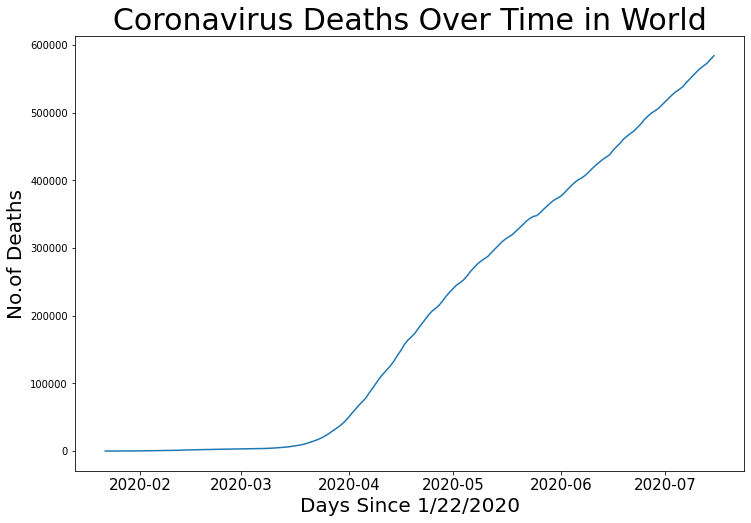

In [ ]:
#Graph for Deaths in World

plt.figure(figsize=(12, 8))
plt.plot(dates,world_deaths)
plt.title('Coronavirus Deaths Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Deaths', size=20)
plt.xticks(size=15)
plt.show()

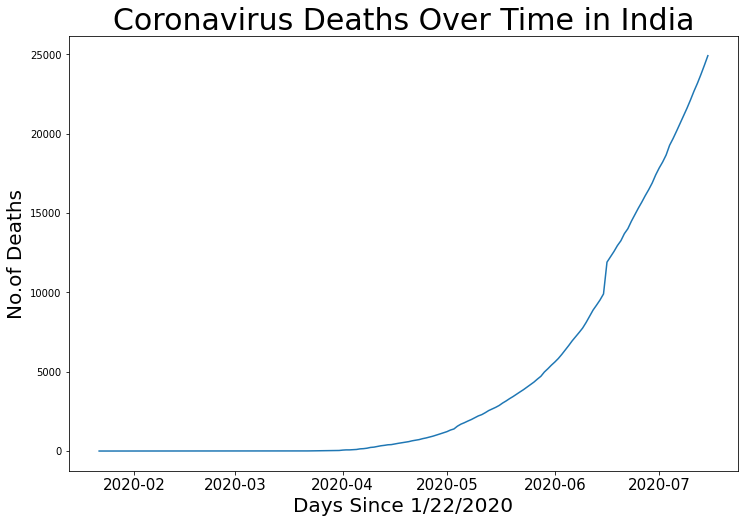

In [ ]:
#Graph for deaths in India

plt.figure(figsize=(12, 8))
plt.plot(dates,India_deaths)
plt.title('Coronavirus Deaths Over Time in India', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Deaths', size=20)
plt.xticks(size=15)
plt.show()

#Prediction

In [ ]:
days_in_future = 15
prediction_days = np.array([i for i in range(len(days)+days_in_future)]).reshape(-1, 1)
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
prediction_dates = []
for i in range(len(prediction_days)):
    prediction_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
prediction_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

In [ ]:
xtrain_world_deaths,xtest_world_deaths,ytrain_world_deaths,ytest_world_deaths=train_test_split(days,world_deaths,test_size=0.35)
xtrain_ind_deaths,xtest_ind_deaths,ytrain_ind_deaths,ytest_ind_deaths=train_test_split(days,India_deaths,test_size=0.35)

In [ ]:
#Linear Regression

# World
lmodel_world_deaths=LinearRegression()
lmodel_world_deaths.fit(xtrain_world_deaths,ytrain_world_deaths)
lmodel_world_deaths_test=lmodel_world_deaths.predict(xtest_world_deaths)
lmodel_world_deaths_predict=lmodel_world_deaths.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(lmodel_world_deaths_test, ytest_world_deaths))
print('MSE:',metrics.mean_squared_error(lmodel_world_deaths_test,ytest_world_deaths))
print('R2 :',metrics.r2_score(lmodel_world_deaths_test,ytest_world_deaths))
print('Training score:',lmodel_world_deaths.score(xtrain_world_deaths,ytrain_world_deaths))
print('Testing score:',lmodel_world_deaths.score(xtest_world_deaths,ytest_world_deaths))
print('Co-efficient:',lmodel_world_deaths.coef_)
print('Intercept:',lmodel_world_deaths.intercept_)

MAE: 39279.81191530743
MSE: 2209723892.134938
R2 : 0.9293712018845715
Training score: 0.9216719349545783
Testing score: 0.9447800451727505
Co-efficient: [[3649.62245925]]
Intercept: [-114116.11917064]


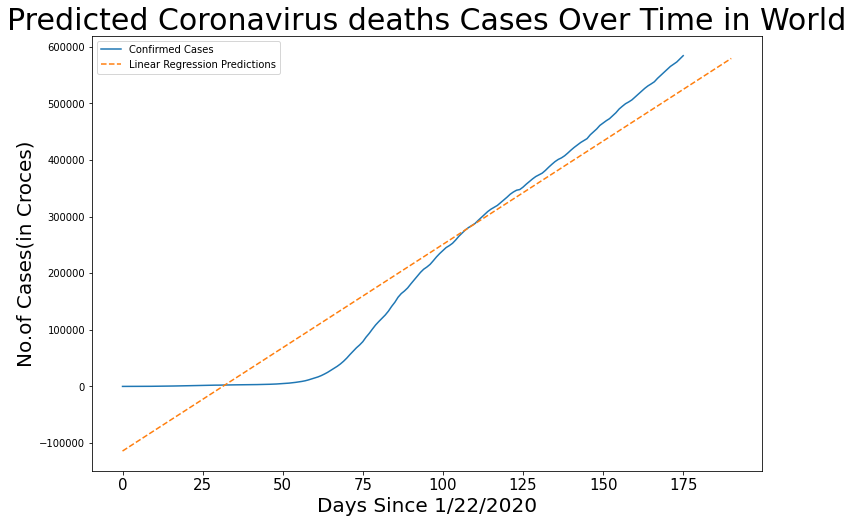

In [ ]:
#Graph for Linear Predicted deaths in World

plt.figure(figsize=(12, 8))
plt.plot(days,world_deaths)
plt.plot(prediction_days,lmodel_world_deaths_predict,linestyle='dashed')
plt.title('Predicted Coronavirus deaths Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
lmodel_world_deaths_predict = lmodel_world_deaths_predict.reshape(1,-1)[0]
df_world_deaths_linear_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Linear Regression Predicted # of deaths Cases Worldwide': np.round(lmodel_world_deaths_predict[-(days_in_future):])})
df_world_deaths_linear_predict

,Date,Linear Regression Predicted # of deaths Cases Worldwide
0,07/16/2020,528217.0
1,07/17/2020,531867.0
2,07/18/2020,535517.0
3,07/19/2020,539166.0
4,07/20/2020,542816.0
5,07/21/2020,546466.0
6,07/22/2020,550115.0
7,07/23/2020,553765.0
8,07/24/2020,557414.0
9,07/25/2020,561064.0


In [ ]:
# India
lmodel_ind_deaths=LinearRegression()
lmodel_ind_deaths.fit(xtrain_ind_deaths,ytrain_ind_deaths)
lmodel_ind_deaths_test=lmodel_ind_deaths.predict(xtest_ind_deaths)
lmodel_ind_deaths_predict=lmodel_ind_deaths.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(lmodel_ind_deaths_test, ytest_ind_deaths))
print('MSE:',metrics.mean_squared_error(lmodel_ind_deaths_test,ytest_ind_deaths))
print('R2 :',metrics.r2_score(lmodel_ind_deaths_test,ytest_ind_deaths))
print('Training score:',lmodel_ind_deaths.score(xtrain_ind_deaths,ytrain_ind_deaths))
print('Testing score:',lmodel_ind_deaths.score(xtest_ind_deaths,ytest_ind_deaths))
print('Co-efficient:',lmodel_ind_deaths.coef_)
print('Intercept:',lmodel_ind_deaths.intercept_)

MAE: 3658.4224460042146
MSE: 16615224.101891173
R2 : 0.4679702400742545
Training score: 0.703378989514063
Testing score: 0.5021028340569105
Co-efficient: [[115.45631833]]
Intercept: [-5455.71844334]


In [ ]:
#Graph for Linear Predicted deaths in India

plt.figure(figsize=(12, 8))
plt.plot(days,India_recovered)
plt.plot(prediction_days,lmodel_ind_recovered_predict,linestyle='dashed')
plt.title('Predicted Coronavirus Recovered Cases Over Time in India', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.show()

NameError: ignored

<Figure size 864x576 with 0 Axes>

In [ ]:
#Prediction in India
lmodel_ind_deaths_predict = lmodel_ind_deaths_predict.reshape(1,-1)[0]
df_ind_deaths_linear_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Linear Regression Predicted # of deaths Cases in India': np.round(lmodel_ind_deaths_predict[-(days_in_future):])})
df_ind_deaths_linear_predict

In [ ]:
# Polynomial Regression

#India

error_deaths=[]
for i in range(0,20):
  pol=PolynomialFeatures(degree=i)
  pol_world_deaths=pol.fit_transform(xtrain_world_deaths)
  pol_world_deaths_test=pol.fit_transform(xtest_world_deaths)
  lmodel=LinearRegression()
  lmodel.fit(pol_world_deaths,ytrain_world_deaths)
  pol_world_deaths_predict=lmodel.predict(pol_world_deaths_test)
  e=metrics.mean_absolute_error(pol_world_deaths_predict,ytest_world_deaths)
  error_deaths.append(e)
plt.plot(range(0,20),error_deaths)
plt.show()

In [ ]:
pol=PolynomialFeatures(degree=3)
pol_world_deaths=pol.fit_transform(xtrain_world_deaths)
pol_world_deaths_test=pol.fit_transform(xtest_world_deaths)
pol_world_deaths_predict_days=pol.fit_transform(prediction_days)
pmodel=LinearRegression()
pmodel.fit(pol_world_deaths,ytrain_world_deaths)
pol_world_deaths_predict=pmodel.predict(pol_world_deaths_test)
pol_world_deaths_days=pmodel.predict(pol_world_deaths_predict_days)
print('MAE:', metrics.mean_absolute_error(pol_world_deaths_predict, ytest_world_deaths))
print('MSE:',metrics.mean_squared_error(pol_world_deaths_predict,ytest_world_deaths))
print('R2 :',metrics.r2_score(pol_world_deaths_predict,ytest_world_deaths))
print('Training score:',pmodel.score(pol_world_deaths,ytrain_world_deaths))
print('Testing score:',pmodel.score(pol_world_deaths_test,ytest_world_deaths))
print('Co-efficient:',pmodel.coef_)
print('Intercept:',pmodel.intercept_)

In [ ]:
#Graph for Polynomial Predicted deaths in World

plt.figure(figsize=(12, 8))
plt.plot(days,world_deaths)
plt.plot(prediction_days,pol_world_deaths_days,linestyle='dashed')
plt.title('Polynomial Predicted Coronavirus deaths Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['deaths Cases', 'Polynomial Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
pol_world_deaths_days = pol_world_deaths_days.reshape(1,-1)[0]
df_world_deaths_poly_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Polynomial Regression Predicted # of deaths Cases Worldwide': np.round(pol_world_deaths_days[-(days_in_future):])})
df_world_deaths_poly_predict

In [ ]:
#India

error_deaths=[]
for i in range(0,20):
  pol=PolynomialFeatures(degree=i)
  pol_ind_deaths=pol.fit_transform(xtrain_ind_deaths)
  pol_ind_deaths_test=pol.fit_transform(xtest_ind_deaths)
  lmodel=LinearRegression()
  lmodel.fit(pol_ind_deaths,ytrain_ind_deaths)
  pol_ind_deaths_predict=lmodel.predict(pol_ind_deaths_test)
  e=metrics.mean_absolute_error(pol_ind_deaths_predict,ytest_ind_deaths)
  error_deaths.append(e)
plt.plot(range(0,20),error_deaths)
plt.show()

In [ ]:
pol=PolynomialFeatures(degree=3)
pol_ind_deaths=pol.fit_transform(xtrain_ind_deaths)
pol_ind_deaths_test=pol.fit_transform(xtest_ind_deaths)
pol_ind_deaths_predict_days=pol.fit_transform(prediction_days)
pmodel=LinearRegression()
pmodel.fit(pol_ind_deaths,ytrain_ind_deaths)
pol_ind_deaths_predict=pmodel.predict(pol_ind_deaths_test)
pol_ind_deaths_days=pmodel.predict(pol_ind_deaths_predict_days)
print('MAE:', metrics.mean_absolute_error(pol_ind_deaths_predict, ytest_ind_deaths))
print('MSE:',metrics.mean_squared_error(pol_ind_deaths_predict,ytest_ind_deaths))
print('R2 :',metrics.r2_score(pol_ind_deaths_predict,ytest_ind_deaths))
print('Training score:',pmodel.score(pol_ind_deaths,ytrain_ind_deaths))
print('Testing score:',pmodel.score(pol_ind_deaths_test,ytest_ind_deaths))
print('Co-efficient:',pmodel.coef_)
print('Intercept:',pmodel.intercept_)

NameError: ignored

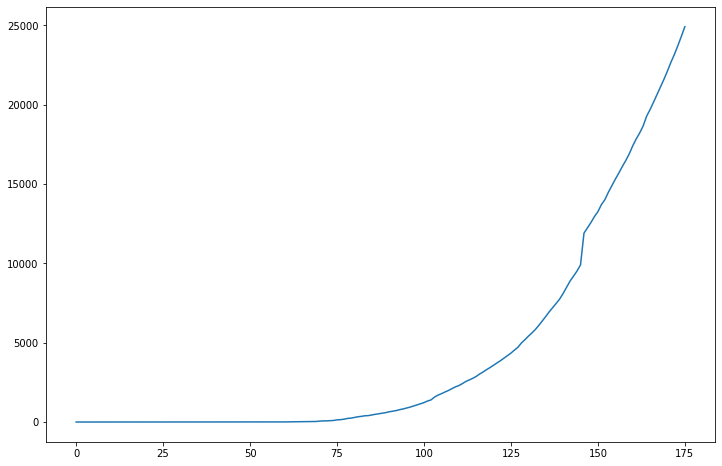

In [ ]:
#Graph for Polynomial Predicted deaths in India

plt.figure(figsize=(12, 8))
plt.plot(days,India_deaths)
plt.plot(prediction_days,pol_ind_deaths_days,linestyle='dashed')
plt.title('Polynomial Predicted Coronavirus deaths Cases Over Time in India', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Lakhs)', size=20)
plt.legend(['deaths Cases', 'Polynomial Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
pol_ind_deaths_days = pol_ind_deaths_days.reshape(1,-1)[0]
df_ind_deaths_poly_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Polynomial Regression Predicted # of deaths Cases India': np.round(pol_ind_deaths_days[-(days_in_future):])})
df_ind_deaths_poly_predict

NameError: ignored

In [ ]:
#Bayesian Ridge

#To get Best Parameters

reg_world_deaths=BayesianRidge()
reg_world_deaths.fit(xtrain_world_deaths,ytrain_world_deaths)
print(reg_world_deaths.get_params)

In [ ]:
#World

reg_world_deaths=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
reg_world_deaths.fit(xtrain_world_deaths,ytrain_world_deaths)
reg_world_deaths_test = reg_world_deaths.predict(xtest_world_deaths)
reg_world_deaths_predict_days = reg_world_deaths.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(reg_world_deaths_test, ytest_world_deaths))
print('MSE:',metrics.mean_squared_error(reg_world_deaths_test, ytest_world_deaths))
print('R2 :',metrics.r2_score(reg_world_deaths_test, ytest_world_deaths))
print('Training score:',reg_world_deaths.score(xtrain_world_deaths,ytrain_world_deaths))
print('Testing score:',reg_world_deaths.score(xtest_world_deaths,ytest_world_deaths))

MAE: 39349.06890568473
MSE: 2214369378.1763134
R2 : 0.9291161390588739
Training score: 0.9216714136359194
Testing score: 0.9446639566739709


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


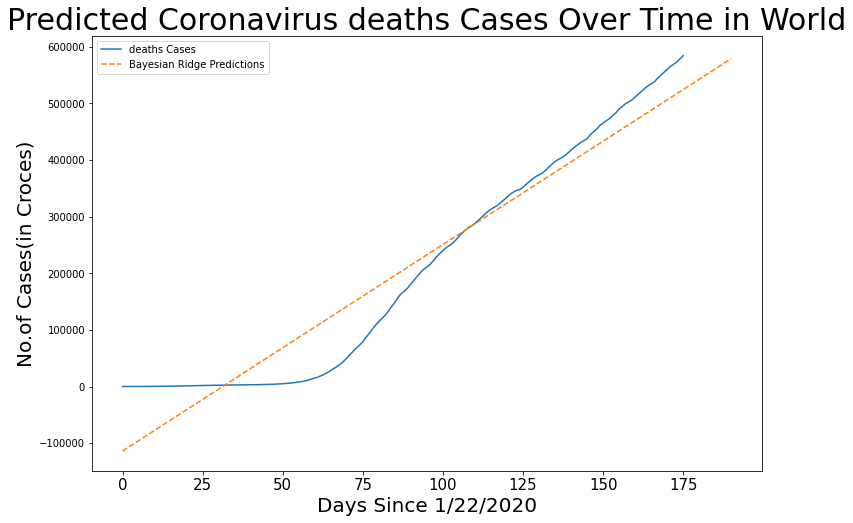

In [ ]:
#Graph for Bayesian Predicted deaths in World

plt.figure(figsize=(12, 8))
plt.plot(days,world_deaths)
plt.plot(prediction_days,reg_world_deaths_predict_days,linestyle='dashed')
plt.title('Predicted Coronavirus deaths Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['deaths Cases', 'Bayesian Ridge Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
reg_world_deaths_predict_days = reg_world_deaths_predict_days.reshape(1,-1)[0]
df_world_deaths_reg_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Bayesian Ridge Predicted # of deaths Cases Worldwide': np.round(reg_world_deaths_predict_days[-(days_in_future):])})
df_world_deaths_reg_predict

,Date,Bayesian Ridge Predicted # of deaths Cases Worldwide
0,07/16/2020,527959.0
1,07/17/2020,531605.0
2,07/18/2020,535252.0
3,07/19/2020,538899.0
4,07/20/2020,542546.0
5,07/21/2020,546193.0
6,07/22/2020,549840.0
7,07/23/2020,553487.0
8,07/24/2020,557134.0
9,07/25/2020,560781.0


In [ ]:
#To get Parameters

reg_ind_deaths=BayesianRidge()
reg_ind_deaths.fit(xtrain_ind_deaths,ytrain_ind_deaths)
print(reg_ind_deaths.get_params)

<bound method BaseEstimator.get_params of BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)>


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#India

reg_ind_deaths=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
reg_ind_deaths.fit(xtrain_ind_deaths,ytrain_ind_deaths)
reg_ind_deaths_test = reg_ind_deaths.predict(xtest_ind_deaths)
reg_ind_deaths_predict_days = reg_ind_deaths.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(reg_ind_deaths_test, ytest_ind_deaths))
print('MSE:',metrics.mean_squared_error(reg_ind_deaths_test, ytest_ind_deaths))
print('R2 :',metrics.r2_score(reg_ind_deaths_test, ytest_ind_deaths))
print('Training score:',reg_ind_deaths.score(xtrain_ind_deaths,ytrain_ind_deaths))
print('Testing score:',reg_ind_deaths.score(xtest_ind_deaths,ytest_ind_deaths))

MAE: 3650.5064649412093
MSE: 16567542.711959118
R2 : 0.46551513816817025
Training score: 0.703369193277346
Testing score: 0.5035316699708778


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


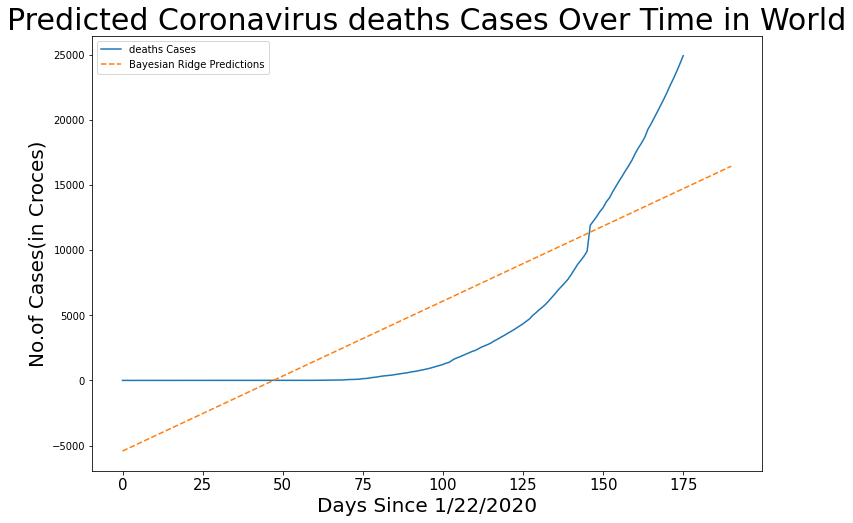

In [ ]:
#Graph for Bayesian Predicted deaths in India

plt.figure(figsize=(12, 8))
plt.plot(days,India_deaths)
plt.plot(prediction_days,reg_ind_deaths_predict_days,linestyle='dashed')
plt.title('Predicted Coronavirus deaths Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['deaths Cases', 'Bayesian Ridge Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
reg_ind_deaths_predict_days = reg_ind_deaths_predict_days.reshape(1,-1)[0]
df_ind_deaths_reg_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'Bayesian Ridge Predicted # of deaths Cases India': np.round(reg_ind_deaths_predict_days[-(days_in_future):])})
df_ind_deaths_reg_predict

,Date,Bayesian Ridge Predicted # of deaths Cases India
0,07/16/2020,14827.0
1,07/17/2020,14942.0
2,07/18/2020,15057.0
3,07/19/2020,15172.0
4,07/20/2020,15287.0
5,07/21/2020,15402.0
6,07/22/2020,15517.0
7,07/23/2020,15632.0
8,07/24/2020,15747.0
9,07/25/2020,15862.0


In [ ]:
#SVR

In [ ]:
#World

svm_world_deaths = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_world_deaths.fit(xtrain_world_deaths, ytrain_world_deaths)
svm_world_deaths_predict = svm_world_deaths.predict(xtest_world_deaths)
svm_world_deaths_predict_days=svm_world_deaths.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(svm_world_deaths_predict, ytest_world_deaths))
print('MSE:',metrics.mean_squared_error(svm_world_deaths_predict, ytest_world_deaths))
print('R2 :',metrics.r2_score(svm_world_deaths_predict, ytest_world_deaths))
print('Training score:',svm_world_deaths.score(xtrain_world_deaths,ytrain_world_deaths))
print('Testing score:',svm_world_deaths.score(xtest_world_deaths,ytest_world_deaths))

MAE: 48556.25194046622
MSE: 4199182188.2220445
R2 : 0.9195917278295512
Training score: 0.901009458362729
Testing score: 0.8950644234013415


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


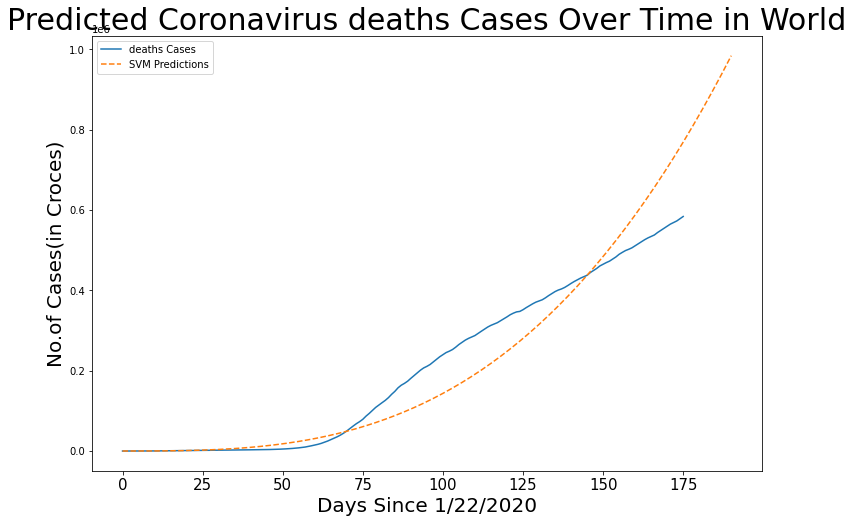

In [ ]:
#Graph for SVM Predicted deaths  in World

plt.figure(figsize=(12, 8))
plt.plot(days,world_deaths)
plt.plot(prediction_days,svm_world_deaths_predict_days,linestyle='dashed')
plt.title('Predicted Coronavirus deaths Cases Over Time in World', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['deaths Cases', 'SVM Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
svm_world_deaths_predict_days = svm_world_deaths_predict_days.reshape(1,-1)[0]
df_world_deaths_svm_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'SVM Predicted # of deaths Cases Worldwide': np.round(svm_world_deaths_predict_days[-(days_in_future):])})
df_world_deaths_svm_predict

,Date,SVM Predicted # of deaths Cases Worldwide
0,07/16/2020,782581.0
1,07/17/2020,795995.0
2,07/18/2020,809562.0
3,07/19/2020,823282.0
4,07/20/2020,837156.0
5,07/21/2020,851185.0
6,07/22/2020,865370.0
7,07/23/2020,879712.0
8,07/24/2020,894211.0
9,07/25/2020,908869.0


In [ ]:
#India

svm_ind_deaths = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_ind_deaths.fit(xtrain_ind_deaths, ytrain_ind_deaths)
svm_ind_deaths_predict = svm_ind_deaths.predict(xtest_ind_deaths)
svm_ind_deaths_predict_days=svm_ind_deaths.predict(prediction_days)
print('MAE:', metrics.mean_absolute_error(svm_ind_deaths_predict, ytest_ind_deaths))
print('MSE:',metrics.mean_squared_error(svm_ind_deaths_predict, ytest_ind_deaths))
print('R2 :',metrics.r2_score(svm_ind_deaths_predict, ytest_ind_deaths))
print('Training score:',svm_ind_deaths.score(xtrain_ind_deaths,ytrain_ind_deaths))
print('Testing score:',svm_ind_deaths.score(xtest_ind_deaths,ytest_ind_deaths))

MAE: 1525.097086845902
MSE: 3308961.2263226
R2 : 0.8989124000259909
Training score: 0.9531455716377492
Testing score: 0.900842600334589


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


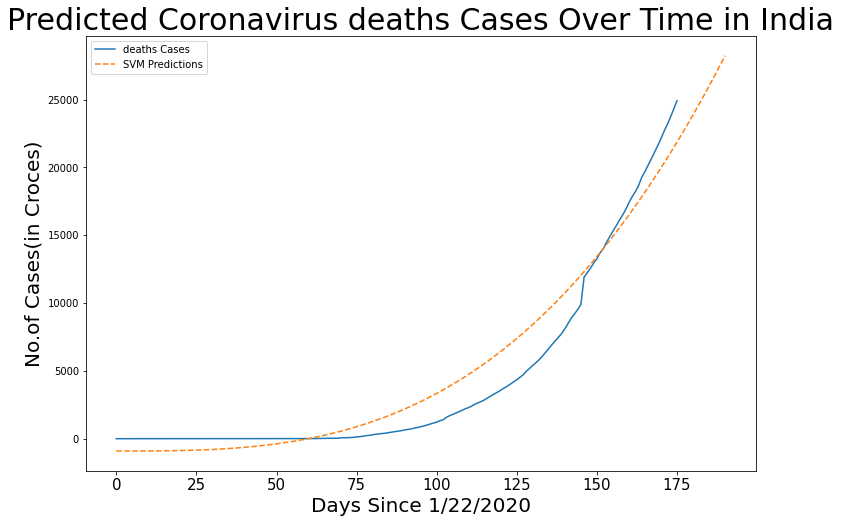

In [ ]:
#Graph for SVM Predicted deaths in India

plt.figure(figsize=(12, 8))
plt.plot(days,India_deaths)
plt.plot(prediction_days,svm_ind_deaths_predict_days,linestyle='dashed')
plt.title('Predicted Coronavirus deaths Cases Over Time in India', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('No.of Cases(in Croces)', size=20)
plt.legend(['deaths Cases', 'SVM Predictions'])
plt.xticks(size=15)
plt.show()

In [ ]:
svm_ind_deaths_predict_days = svm_ind_deaths_predict_days.reshape(1,-1)[0]
df_ind_deaths_svm1_predict = pd.DataFrame({'Date': prediction_dates[-(days_in_future):], 'SVM Predicted # of deaths Cases India': np.round(svm_ind_deaths_predict_days[-(days_in_future):])})
df_ind_deaths_svm1_predict

,Date,SVM Predicted # of deaths Cases India
0,07/16/2020,22252.0
1,07/17/2020,22649.0
2,07/18/2020,23051.0
3,07/19/2020,23457.0
4,07/20/2020,23868.0
5,07/21/2020,24283.0
6,07/22/2020,24703.0
7,07/23/2020,25127.0
8,07/24/2020,25556.0
9,07/25/2020,25990.0
